In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML, Image
import pygal
from functools import reduce
import collections
from datetime import datetime, timedelta
from hw1 import retrieveData, groupByType, dfByType, galplot

## Problem 1: Data Acquisition and Analysis
### 1.1 First thing's first: Import all three CSVs

In [2]:
(alley, graffiti, building) = retrieveData()
assert(not alley.empty)
assert(not graffiti.empty)
assert(not building.empty)

### Sub-types
Let's select a couple of columns in each set to use for our sub-type analysis, then group by those columns for summarization:

In [3]:
building_type = "IS BUILDING OPEN OR BOARDED?"
building_subtypes = groupByType(building, building_type)
    
building_subtypes

[{'label': 'Boarded', 'value': 688}, {'label': 'Open', 'value': 3140}]

In [4]:
alley_type = "Status"
alley_subtypes = groupByType(alley, alley_type)

alley_subtypes

[{'label': 'Completed', 'value': 14014},
 {'label': 'Completed - Dup', 'value': 13635},
 {'label': 'Open', 'value': 4339},
 {'label': 'Open - Dup', 'value': 2993}]

In [5]:
graffiti_type = "What Type of Surface is the Graffiti on?"
graffiti_subtypes = groupByType(graffiti, graffiti_type)

graffiti_subtypes

[{'label': 'Aluminum Siding', 'value': 3544},
 {'label': 'Asphalt', 'value': 116},
 {'label': 'Brick - Painted', 'value': 17994},
 {'label': 'Brick - Unpainted', 'value': 24359},
 {'label': 'Cement (Sidewalk, Alley, Wall, Curb)', 'value': 12224},
 {'label': 'Glass', 'value': 3371},
 {'label': 'Limestone', 'value': 499},
 {'label': 'Marble/Granite', 'value': 200},
 {'label': 'Metal - Painted', 'value': 54378},
 {'label': 'Metal - Unpainted', 'value': 12096},
 {'label': 'Other / Unknown Surface', 'value': 2400},
 {'label': 'Other/Unknown Surface', 'value': 2636},
 {'label': 'Stucco', 'value': 312},
 {'label': 'Tree', 'value': 167},
 {'label': 'Vinyl Siding', 'value': 1714},
 {'label': 'Wood - Painted', 'value': 5596},
 {'label': 'Wood - Unpainted', 'value': 1971}]

### 1.2
Now, let's simply see what the biggest source of calls are, and visualize this data at a very basic level:
Questions: 
- What is the breakdown of 311 call types among Building Calls, Alley Light Outage Calls, and Graffiti Removal calls? (Nested pie chart)
- In which wards are calls of each type most prevalent? (Stacked bar chart)
- Are calls for a given type of 311 call increasing over time? Decreasing over time? (Summary table)
- How long did each of these calls take to be resolved for each of these cases in 2017? (Stacked bar chart)

Please see below for the output answers to each of these questions

In [6]:
pie_chart = pygal.Pie()
pie_chart.title = '311 Call Types'
pie_chart.add("Building Calls", building_subtypes)
pie_chart.add("Alley Light Calls", alley_subtypes)
pie_chart.add("Graffiti Removal Calls", graffiti_subtypes)
galplot(pie_chart)

#### Calls by Ward

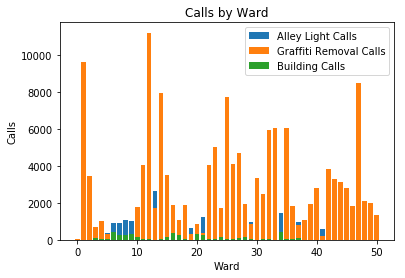

In [7]:
ward_type = "Ward"
ward_alley = dfByType(alley, ward_type)
ward_graffiti = dfByType(graffiti, ward_type)
ward_buildings = dfByType(building, ward_type)
    
ward_alley

plt.figure(0)
fig, ax = plt.subplots()
ax.bar(ward_alley['Ward'], ward_alley['COUNT'], label="Alley Light Calls")
ax.bar(ward_graffiti['Ward'], ward_graffiti['COUNT'], label="Graffiti Removal Calls")
ax.bar(ward_buildings['Ward'], ward_buildings['COUNT'], label="Building Calls")
plt.xlabel("Ward")
plt.ylabel("Calls")
plt.title("Calls by Ward")
ax.legend()

plt.show()

In [8]:
date_alley = dfByType(alley, "Creation Date")
date_alley.set_index(['Creation Date'],inplace=True)
date_alley = date_alley.groupby(pd.Grouper(freq='M'))


date_graffiti = dfByType(graffiti, "Creation Date")
date_graffiti.set_index(['Creation Date'],inplace=True)
date_graffiti = date_graffiti.groupby(pd.Grouper(freq='M'))

date_buildings = dfByType(building, "DATE SERVICE REQUEST WAS RECEIVED")
date_buildings.set_index(["DATE SERVICE REQUEST WAS RECEIVED"],inplace=True)
date_buildings = date_buildings.groupby(pd.Grouper(freq='M'))

print("\nAlley Light calls by Month")
print(date_alley.describe())
print("\nGraffiti calls by Month")
print(date_graffiti.describe())
print("\nBuilding calls by Month")
print(date_buildings.describe())



Alley Light calls by Month
              COUNT                                                         
              count       mean        std   min    25%    50%     75%    max
Creation Date                                                               
2017-01-31     31.0  84.064516  39.507751  21.0  51.00   88.0  112.00  157.0
2017-02-28     28.0  91.142857  38.716170  28.0  44.75   99.0  119.25  162.0
2017-03-31     31.0  79.161290  33.365748  19.0  51.00   78.0  107.50  123.0
2017-04-30     30.0  72.966667  30.830441  21.0  48.50   77.0   92.75  129.0
2017-05-31     31.0  73.290323  34.171327  19.0  37.00   74.0   93.50  129.0
2017-06-30     30.0  80.066667  32.624228  24.0  54.00   85.0  101.00  145.0
2017-07-31     31.0  60.225806  29.490913  16.0  28.00   74.0   84.50  116.0
2017-08-31     31.0  65.451613  28.262860  19.0  38.50   70.0   85.00  111.0
2017-09-30     30.0  60.533333  27.041135  16.0  36.00   68.0   79.75  109.0
2017-10-31     31.0  81.419355  39.470474  21.0 

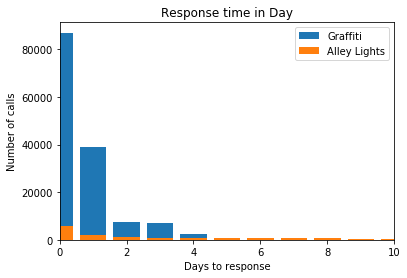

In [19]:
RESOLUTION = "Resolution Time"
graffiti[RESOLUTION] = (graffiti['Completion Date'] - graffiti['Creation Date'])
graffiti_by_resolution = groupByType(graffiti, RESOLUTION)
graffiti_y = []
graffiti_x = []

for point in graffiti_by_resolution:
    graffiti_x.append((point['label'].days))
    graffiti_y.append(point['value'])
    
alley[RESOLUTION] = (alley['Completion Date'] - alley['Creation Date'])
alley_by_resolution = groupByType(alley, RESOLUTION)
alley_y = []
alley_x = []

for point in alley_by_resolution:
    alley_x.append((point['label'].days))
    alley_y.append(point['value'])
    
    
plt.figure(1)
plt.xlim(0, 10)
plt.xlabel("Days to response")
plt.ylabel("Number of calls")
plt.title("Response time in Day")
plt.bar(graffiti_x, graffiti_y, label="Graffiti")
plt.bar(alley_x, alley_y, label="Alley Lights")
plt.legend()
plt.show()

Above, we can see that the vast majority of calls take less than a day to respond. In general though, graffiti response times appear to be better than alley-light response times. Response times for buildings were not made possible by this data set. 

### 1.3 Findings

There were several interesting findings from this data, a few general points listed below:
1. Response times for Graffiti and Alley Light Outages are much better than expected, with the majority coming within the first couple of days. In general though, the team responding to alley lights could be more responsive to meet the standards of the team who responds to graffiti removal requests.
2. There is a group of calls in Wards 6-9 pertaining to Alley Light outages that appears to be an outlier in the data. The majority of the calls come from these wards. According to the data, about 10 wards appear to have significantly more calls for graffiti removal than any of the other wards. Perhaps this means there is more graffiti in 2017, or that the residents are more likely to complain.
3. Graffiti calls comprise the largest portion of the three types of calls, eclipsing alley light outage calls and especially building related calls.
4. In general, calls for graffiti removal are agnostic of the building type vandalized, though there are more calls for removal from metal surfaces than brick. Could this be due to a nicer asthetic on a brick structure than a metal structure? Could it be the type of buildings in a particular neighborhood frequently vandalized? 
5. About one in five building-related calls were for boarded up houses. Further analysis to see this change over time could indicate a growing or lessening problem of city blight in specific neighborhoods.

## Problem 2: Data Augmentation and APIs

In [10]:
from census import Census
from us import states

In [11]:
c = Census("fca63f0c87016d46f9bc5ca3a161d6b85f86f04a")
c.acs5.get(('NAME', 'B25034_010E'), {'for':'state:{}'.format(states.IL.fips)}, year=2016)


[{'B25034_010E': 333531.0, 'NAME': 'Illinois', 'state': '17'}]

## Problem 3: 3600 W Roosevelt

### 3a.
Of the three types of requests you have data for, which request type is the most likely given the call came from 3600 W Roosevelt Ave? What are the probabilities for each type of request?

In [12]:
CA = "Community Area"
CA_NORTH_LAWNDALE = 29

total_alley = len(alley)
total_graffiti = len(graffiti)
total_building = len(building)

NL_alley = len(alley[alley[CA] == CA_NORTH_LAWNDALE])
NL_graffiti = len(graffiti[graffiti[CA] == CA_NORTH_LAWNDALE])
NL_building = len(building[building[CA] == CA_NORTH_LAWNDALE])

pct_alley = NL_alley/total_alley
pct_graffiti = NL_graffiti/total_graffiti
pct_building = NL_building/total_building

print("{}% of Alley calls ({}) were from this address's Community Area.".format(pct_alley, NL_alley))
print("{}% of Graffiti calls ({}) were from this address's Community Area.".format(pct_graffiti, NL_graffiti))
print("{}% of Building calls ({}) were from this address's Community Area.".format(pct_building, NL_building))


0.016294559903947858% of Alley calls (570) were from this address's Community Area.
0.006219362532674187% of Graffiti calls (897) were from this address's Community Area.
0.02719572001783326% of Building calls (122) were from this address's Community Area.


Above, I've decided to group by granularity of Community Area. 3600 W Roosevelt Ave is drawn currently under Community Area 29. Using this detail, I've compiled the percentages for each of our three request types above. Although the highest proportion of calls from Community Area 29 are for Building calls, the highest total calls from Community Area 29 were for graffiti removal requests. Therefore, it is most likely that a call from this community area will be for a request for graffiti removal.

### 3b.
Let’s now assume that a call comes in about Graffiti Removal. Which is more likely – that the call came from Garfield Park or Uptown? How much more or less likely is it to be from Garfield Park vs Uptown?

In [13]:
CA_EAST_GARFIELD=26
CA_WEST_GARFIELD=27
CA_UPTOWN=3

east = len(graffiti[graffiti[CA] == CA_EAST_GARFIELD ])
west = len(graffiti[graffiti[CA] == CA_WEST_GARFIELD])
uptown = len(graffiti[graffiti[CA] == CA_UPTOWN])

pct_garfield = (east + west)/total_graffiti*100
pct_uptown = uptown/total_graffiti*100

print("Garfield calls: {}%".format(pct_garfield))
print("Uptown calls: {}%".format(pct_uptown))
print("It is {}x more likely that the call was from Uptown than Garfield".format(pct_uptown/pct_garfield))

Garfield calls: 0.4291845493562232%
Uptown calls: 1.7042578712723693%
It is 3.97092084006462x more likely that the call was from Uptown than Garfield


Above, I used all 2017 data to determine the percentage of the total graffiti calls coming from East & West Garfield vs the percentage of calls oming from Uptown, based on the Community Area designations of each. 

Given this data, roughly 0.43% of calls came from Garfield, whereas 1.7% of calls came from Uptown. Therefore, it is roughly four times more likely that a call for graffiti removal will come from Uptown rather than Garfield.

### 3c.
Now assume that you don’t have access to all the raw data and you know the following things:

- There are a total of 1000 calls, 600 from Garfield Park and 400 from Uptown. 
- Of the 600 calls from Garfield Park, 100 of them are about Graffiti Removal. Of the 400 calls from Uptown, 160 are about Graffiti Removal. 

If a call comes about Graffiti Removal, how much more/less likely is it that the call came from Garfield Park versus Uptown?

In [14]:
total_calls = 1000
garfield_total_calls = 600
garfield_graffiti_calls = 100
uptown_total_calls = 400
uptown_graffiti_calls = 160

# Given the call is graffiti removal related, what is the likelihood it is from Garfield Park?
total_graffiti_calls = garfield_graffiti_calls + uptown_graffiti_calls

pct_graffiti_garfield = 100*garfield_graffiti_calls/total_graffiti_calls
pct_graffiti_uptown = 100*uptown_graffiti_calls/total_graffiti_calls

graffiti_ratio = pct_graffiti_uptown/pct_graffiti_garfield

print("% of graffiti-related calls from Garfield: {}%".format(pct_graffiti_garfield))
print("% of graffiti-related calls from Uptown {}%".format(pct_graffiti_uptown))
print("It is {}x more likely that the call was from Uptown than Garfield".format(pct_graffiti_uptown/pct_graffiti_garfield))

% of graffiti-related calls from Garfield: 38.46153846153846%
% of graffiti-related calls from Uptown 61.53846153846154%
It is 1.6x more likely that the call was from Uptown than Garfield


Above, using the given data from the problem, we must take the conditional expectation for each neighborhood based on the condition that the call is graffiti-related. Given the call is graffiti-related, there are a total of 100+160=260 calls among the two neighborhoods. Roughly 38% of those calls are from Garfield, and 62% are from Uptown. Therefore it is 1.6 times as likely that the call was from Uptown, rather than Garfield, based on the aggregate data given.